<a href="https://colab.research.google.com/github/Dhanya-Zac/NetflixUSERBASE/blob/main/Netflix_user_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Netflix Userbase Analysis**

Goal: To understand the demogrphic and usage patterns of Netflix users and calculate key performance metrics such as lifetime value(LTV) and insights based on various attributes like each country's users age, device usage, subscription type.


## **Data**

The dataset contains the following columns:

•	**User ID**: A unique identifier for each user.

•	**Subscription Type**: The type of subscription plan (Basic, Standard, Premium).

•	**Monthly Revenue**: The monthly revenue generated from each user.

•	**Join Date**: The date the user joined Netflix.

•	**Last Payment Date**: The date of the last payment made by the user.

•	**Country**: The country of the user.

•	**Age**: The age of the user.

•	**Gender**: The gender of the user.

•	**Device**: The primary device used by the user (Smartphone, Tablet, Smart TV, Laptop).

•	**Plan Duration**: The duration of the subscription plan.

In [ ]:
df=pd.read_csv('Netflix Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [ ]:
df[df.duplicated()]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration


<ipython-input-15-cc03c250ce0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_counts.index, y=user_counts.values, palette='viridis')


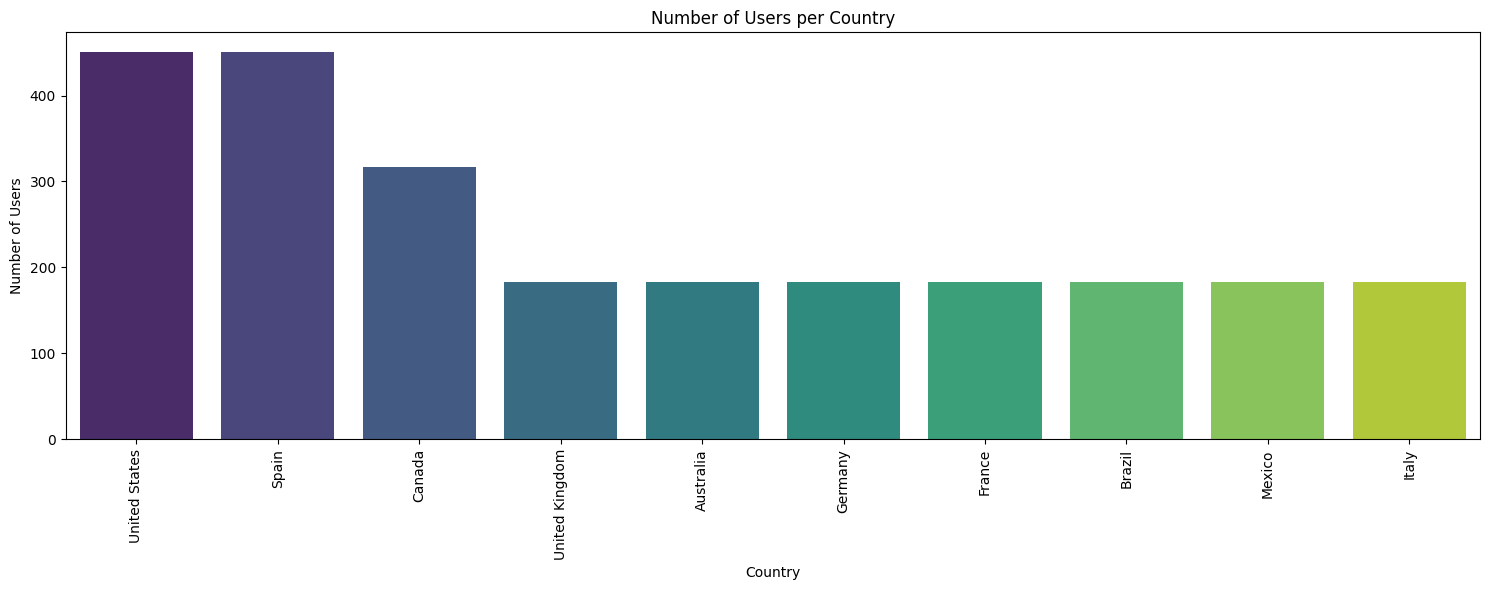

In [ ]:

user_counts = df['Country'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Number of Users per Country')
plt.tight_layout()
plt.show()


<ipython-input-43-3d927df482e3>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




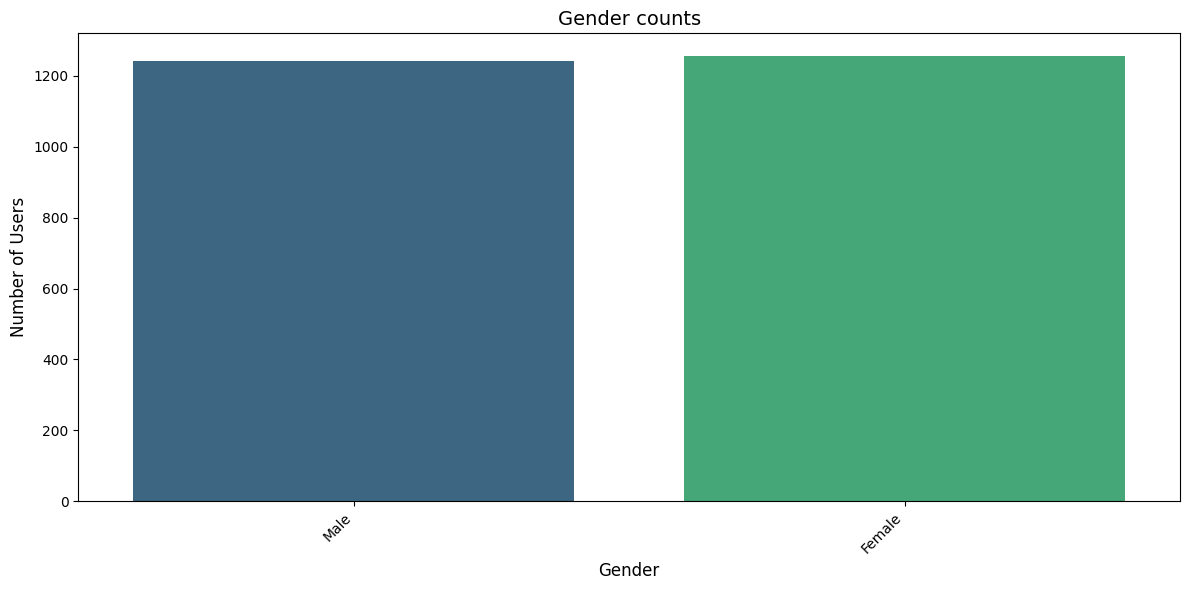

<ipython-input-43-3d927df482e3>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




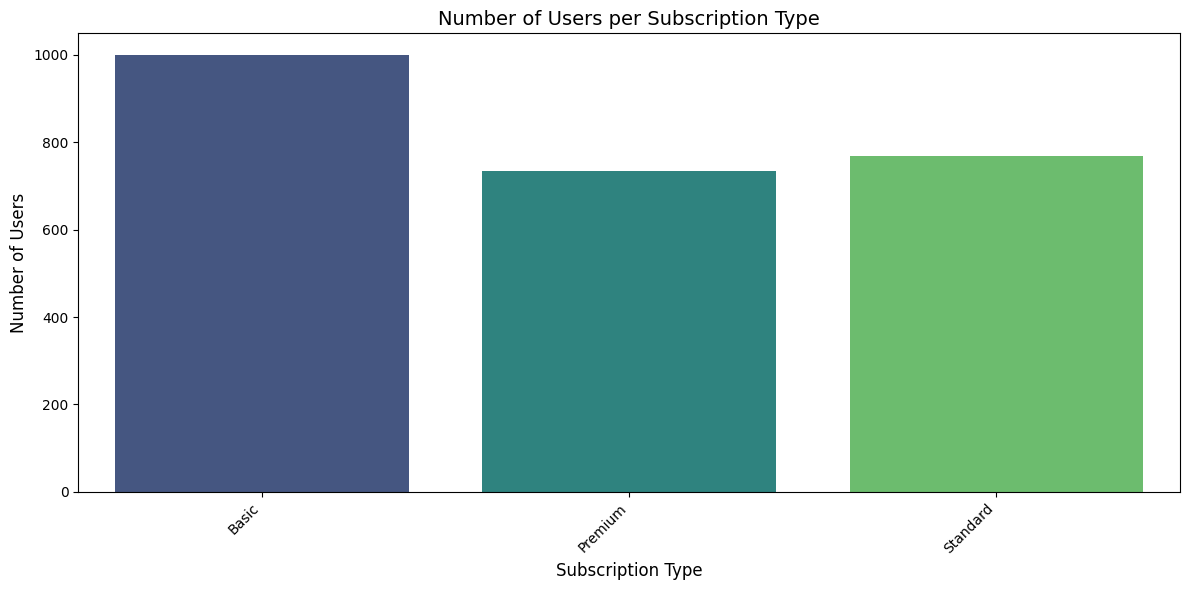

<ipython-input-43-3d927df482e3>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




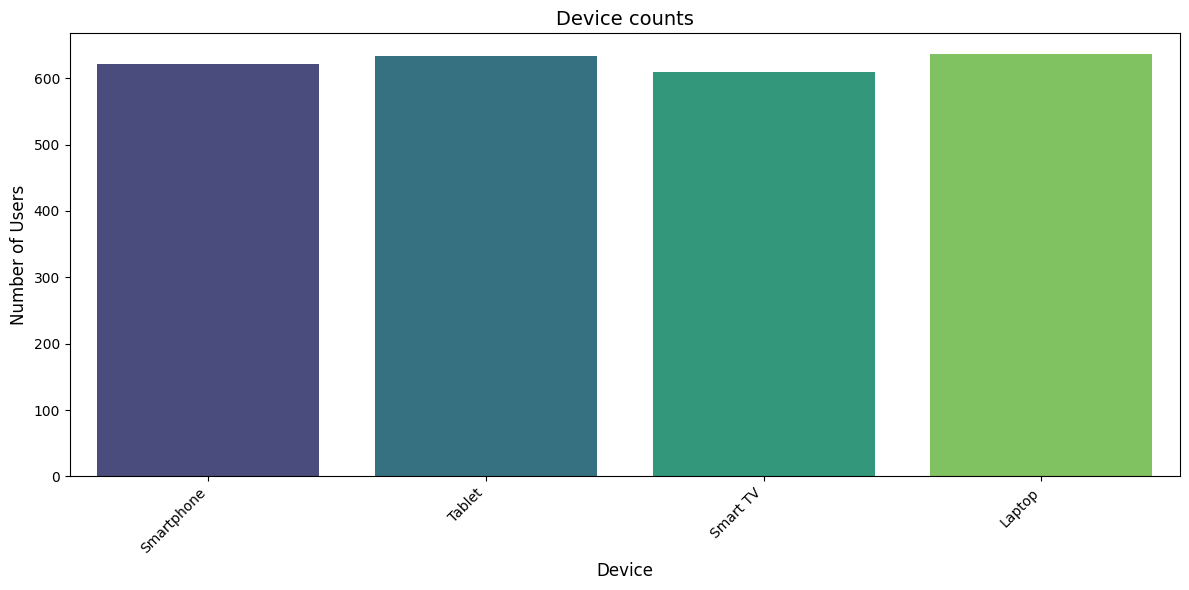

In [ ]:


columns_to_plot = {
    'Gender': 'Gender counts',
    'Subscription Type': 'Number of Users per Subscription Type',
    'Device': 'Device counts'
}

for column, title in columns_to_plot.items():
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x=column, palette='viridis')
  plt.xlabel(column, fontsize=12)
  plt.ylabel('Number of Users', fontsize=12)
  plt.title(title, fontsize=14)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


In [ ]:
# prompt: create a beautiful graph to show distribution of users by country by first create a  new variable user counts by country and create a map as well and a bar plot in descendig order

import plotly.express as px

# Calculate user counts by country
user_counts = df['Country'].value_counts().reset_index()
user_counts.columns = ['Country', 'User Count']

# Create a choropleth map
fig_map = px.choropleth(user_counts,
                        locations='Country',
                        locationmode='country names',
                        color='User Count',
                        color_continuous_scale='Viridis',
                        title='Distribution of Netflix Users by Country')
fig_map.show()

# Create a bar plot in descending order
user_counts_sorted = user_counts.sort_values('User Count', ascending=False)
fig_bar = px.bar(user_counts_sorted,
                 x='Country',
                 y='User Count',
                 color='User Count',
                 color_continuous_scale='Viridis',
                 title='Distribution of Netflix Users by Country (Descending Order)')
fig_bar.update_layout(xaxis_tickangle=-45)
fig_bar.show()


## **Metrics and Analyses**

1.	**Number of Users per Country**

The highest number of users are from the United States and Spain, each with 451 users, making up 18.04% of the total user base each. Following these are Canada with 317 users (12.68%), and the United Kingdom with 183 users (7.32%). Australia, Germany, France, Brazil, Mexico, and Italy each have the same number of users, 183, accounting for 7.32% of the total user base per country.

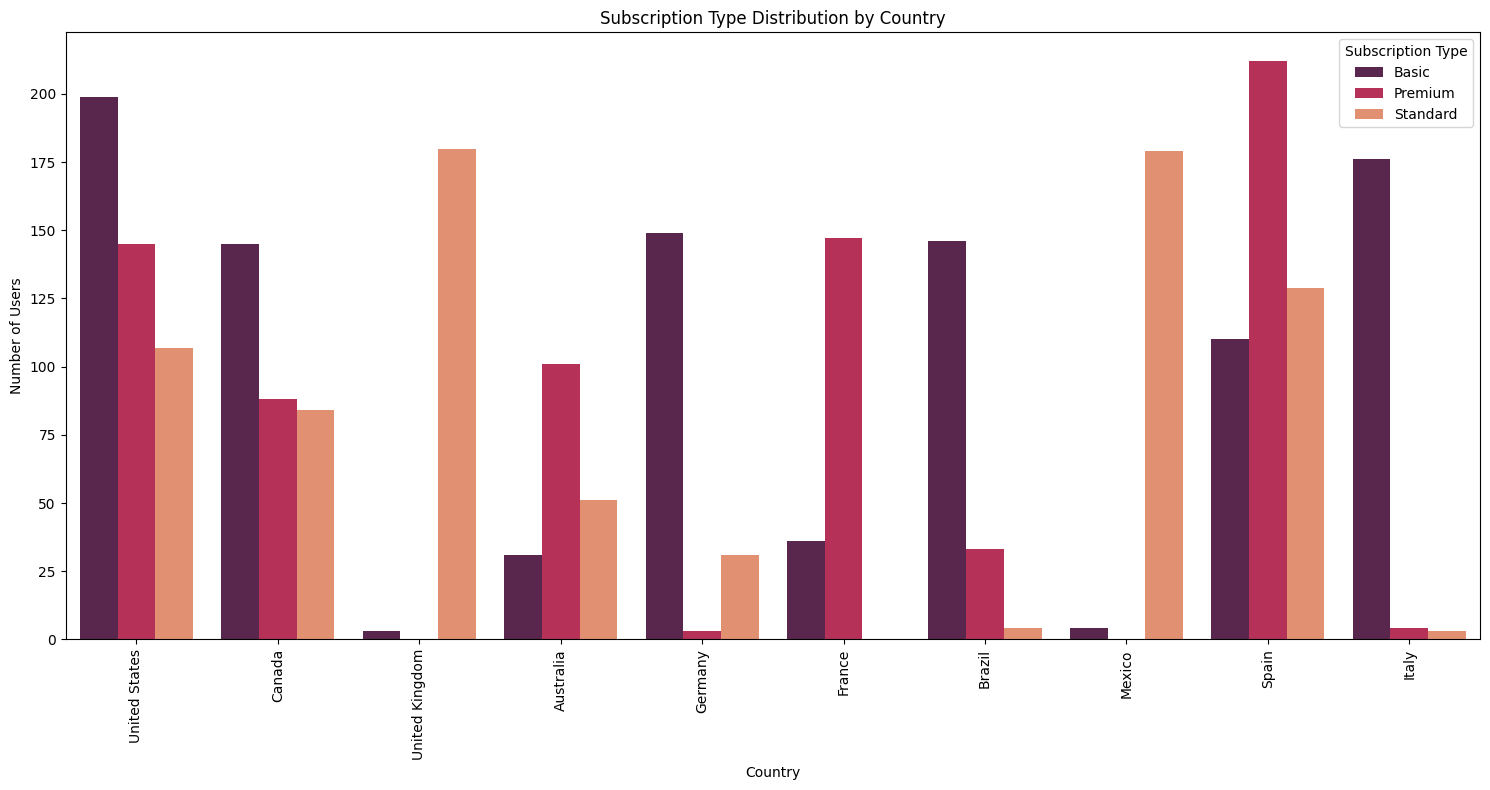

In [ ]:


plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Country', hue='Subscription Type', palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Subscription Type Distribution by Country')
plt.tight_layout()
plt.legend(title='Subscription Type')
plt.show()


In [ ]:
# prompt: create a  table with data numbers  of no of users   in each subscripton type for each country for final summary report.

# Group the data by country and subscription type, then count the users
subscription_counts = df.groupby(['Country', 'Subscription Type'])['User ID'].count().reset_index(name='User Count')

# Pivot the table to have countries as rows and subscription types as columns
subscription_table = subscription_counts.pivot(index='Country', columns='Subscription Type', values='User Count').fillna(0)

# Display the table
print(subscription_table)


Subscription Type  Basic  Premium  Standard
Country                                    
Australia           31.0    101.0      51.0
Brazil             146.0     33.0       4.0
Canada             145.0     88.0      84.0
France              36.0    147.0       0.0
Germany            149.0      3.0      31.0
Italy              176.0      4.0       3.0
Mexico               4.0      0.0     179.0
Spain              110.0    212.0     129.0
United Kingdom       3.0      0.0     180.0
United States      199.0    145.0     107.0


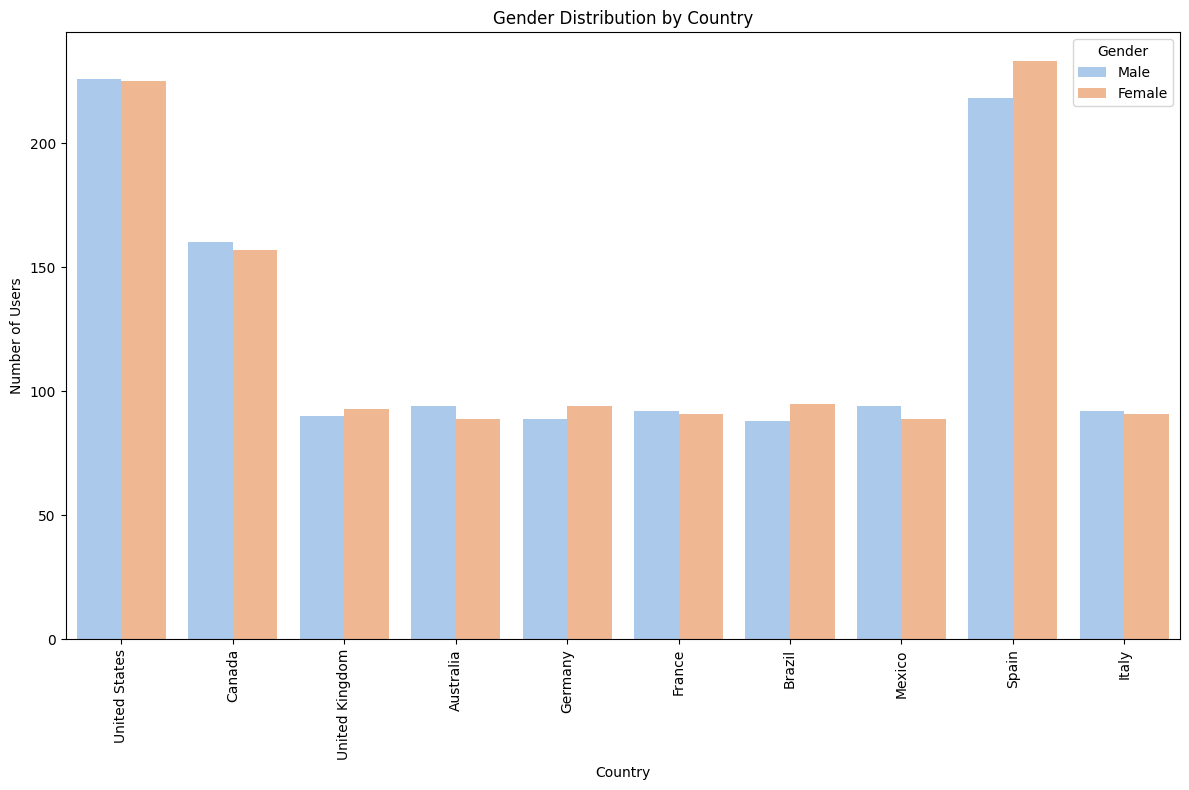

In [ ]:


plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country', hue='Gender', palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Gender Distribution by Country')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


2.	**Gender Counts**

The overall gender distribution among users is almost equal, with 1257 female users (50.28%) and 1243 male users (49.72%).

The gender distribution is almost equal across all countries, with a nearly balanced ratio of female and male users in each country. For example, in the United States, the distribution is 49.89% female and 50.11% male, and in Spain, it is 51.66% female and 48.34% male, reflecting a similar balance in other countries as well.

In [ ]:
# prompt: create a pivot table for gender by country data

# Group the data by country and gender, then count the users
gender_counts = df.groupby(['Country', 'Gender'])['User ID'].count().reset_index(name='User Count')

# Pivot the table to have countries as rows and genders as columns
gender_table = gender_counts.pivot(index='Country', columns='Gender', values='User Count').fillna(0)

# Display the table
print(gender_table)


Gender          Female  Male
Country                     
Australia           89    94
Brazil              95    88
Canada             157   160
France              91    92
Germany             94    89
Italy               91    92
Mexico              89    94
Spain              233   218
United Kingdom      93    90
United States      225   226


In [ ]:
# prompt: include all data in single pivot table for subscription type and gender by country

# Group the data by country, subscription type, and gender, then count the users
all_counts = df.groupby(['Country', 'Subscription Type', 'Gender'])['User ID'].count().reset_index(name='User Count')

# Pivot the table to have countries as rows and a multi-level index for subscription type and gender as columns
all_table = all_counts.pivot_table(index='Country', columns=['Subscription Type', 'Gender'], values='User Count', fill_value=0)

# Display the table
print(all_table)


Subscription Type  Basic       Premium       Standard      
Gender            Female  Male  Female  Male   Female  Male
Country                                                    
Australia           16.0  15.0    45.0  56.0     28.0  23.0
Brazil              78.0  68.0    16.0  17.0      1.0   3.0
Canada              68.0  77.0    40.0  48.0     49.0  35.0
France              17.0  19.0    74.0  73.0      0.0   0.0
Germany             80.0  69.0     1.0   2.0     13.0  18.0
Italy               86.0  90.0     3.0   1.0      2.0   1.0
Mexico               2.0   2.0     0.0   0.0     87.0  92.0
Spain               60.0  50.0   113.0  99.0     60.0  69.0
United Kingdom       2.0   1.0     0.0   0.0     91.0  89.0
United States      103.0  96.0    72.0  73.0     50.0  57.0


3.	**Device Counts**

The distribution of devices among users is relatively balanced. The breakdown is as follows:

- Laptops are used by 636 users (25.44%).
- Tablets are used by 633 users (25.32%).
- Smartphones are used by 621 users (24.84%).
- Smart TVs are used by 610 users (24.40%).

4.	**Subscription Type Counts**

The distribution of subscription types among users is as follows:

- **Basic:** 999 users (39.96%)
- **Standard:** 768 users (30.72%)
- **Premium:** 733 users (29.32%)

5.	**Age Distribution**

The age distribution of users shows the following statistics:

•	**Mean Age:** 38.8 years

•	**Median Age:** 39.0 years

•	**Minimum Age:** 26 years

•	**Maximum Age:** 51 years

•	**Standard Deviation:** 7.17 years

•	Most Common Ages:

•	30 years: 116 users

•	39 years: 116 users

In [ ]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:

df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')


In [ ]:
df['Duration']=(df['Last Payment Date']-df['Join Date']).dt.days

In [ ]:
df['Duration Months']=df['Duration'].apply(lambda x: math.ceil(x/30))

In [ ]:
average_duration=df['Duration Months'].mean()

In [ ]:
print(f"Average Duration: {average_duration}")

Average Duration: 11.742


In [ ]:
df['LTV']=df['Duration Months']*df['Monthly Revenue']


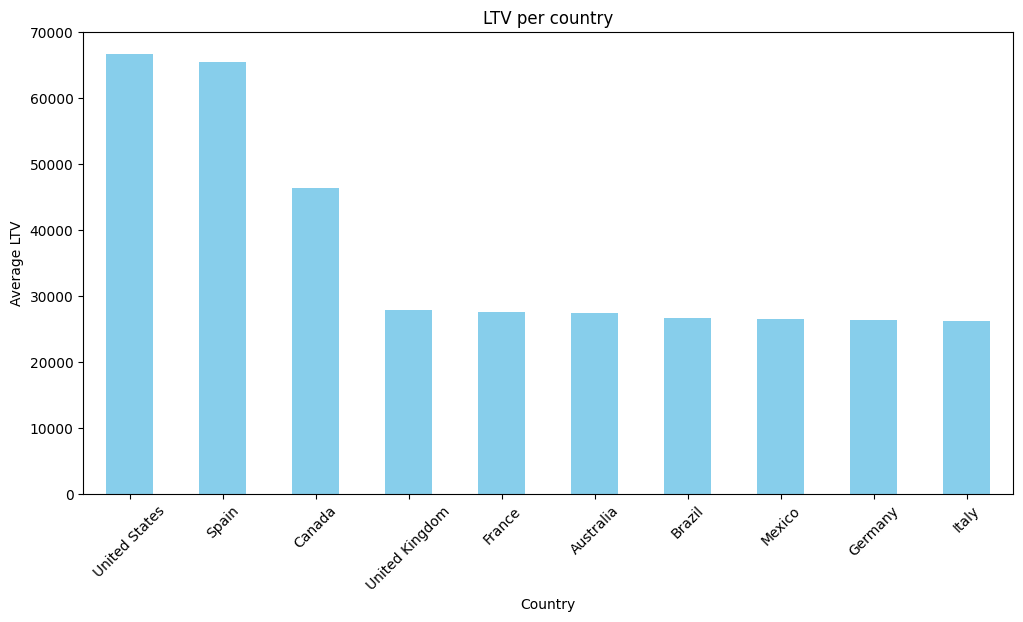

In [ ]:
ltv_per_country_sum=df.groupby('Country')['LTV'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ltv_per_country_sum.plot(kind='bar',color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.title('LTV per country')
plt.xticks(rotation=45)
plt.show()

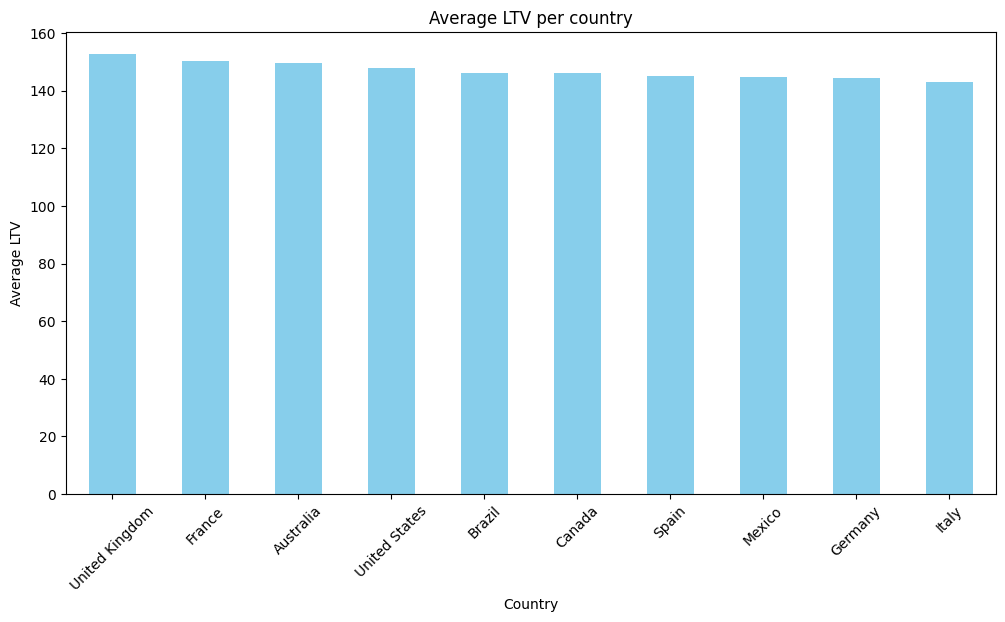

In [ ]:
ltv_per_country=df.groupby('Country')['LTV'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ltv_per_country.plot(kind='bar',color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.title('Average LTV per country')
plt.xticks(rotation=45)
plt.show()

6.	**Duration Between Join Date and Last Payment Date**

The duration between the join date and the last payment date among users shows the following statistics:

•	**Mean Duration:** 308.6 days

•	**Median Duration:** 307.0 days

•	**Minimum Duration:** 8 days

•	**Maximum Duration:** 655 days

7.	**Lifetime Value (LTV)**

The highest total LTV is in the United States, with an LTV of 60,445, accounting for 18.91% of the overall LTV. This is because the United States has the highest number of users. Similarly, Spain has a high total LTV of 59,269 (18.54% of the overall LTV) due to its large user base. Other countries, such as Canada and France, have total LTVs of 43,116 (13.48%) and 26,080 (8.16%) respectively. The total LTVs for the remaining countries, including Australia, Brazil, Germany, Italy, Mexico, and the United Kingdom, range between 23,618 and 25,990, each contributing between 7.38% and 7.84% to the overall LTV.

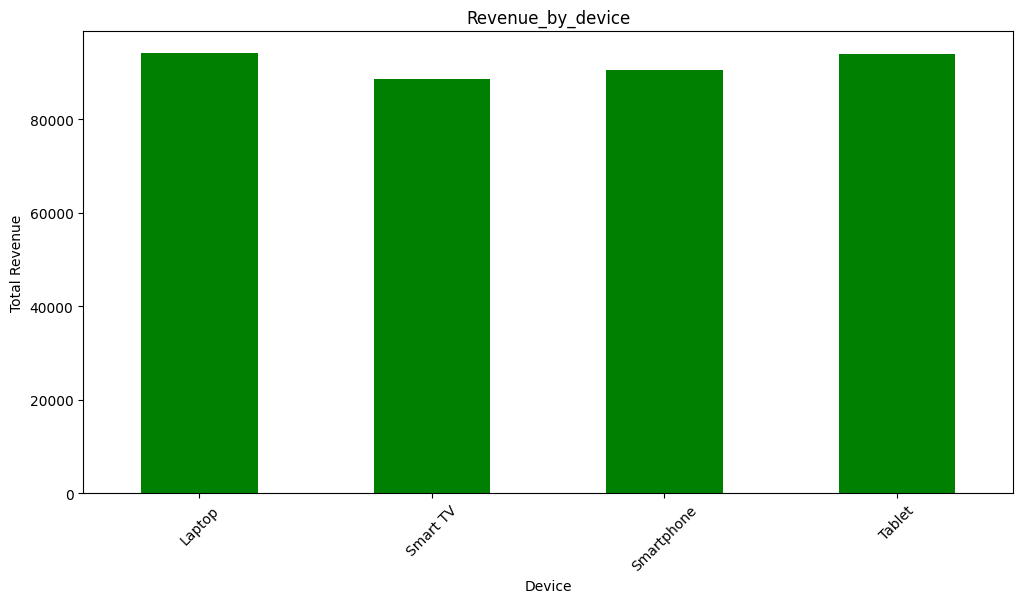

In [ ]:
revenue_by_device=df.groupby('Device')['LTV'].sum()
plt.figure(figsize=(12, 6))
revenue_by_device.plot(kind='bar',color='green')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.title('Revenue_by_device')
plt.xticks(rotation=45)
plt.show()

The average Lifetime Value (LTV) per user varies across different countries. France has the highest average LTV at 142.51, followed closely by the United Kingdom at 142.02. Other countries with relatively high average LTVs include Australia (136.73), Brazil (136.50), and Canada (136.01). The United States, despite having the highest total LTV due to its large user base, has an average LTV of 134.02.

Countries like Germany (133.05), Mexico (132.39), and Spain (131.42) have average LTVs that are slightly lower, while Italy has the lowest average LTV at 129.06.

This analysis highlights that while the United States and Spain have high total LTVs due to their large user bases, countries like France and the United Kingdom lead in terms of average LTV per user.

**Recommendations**

1.	**Focus on High-LTV Countries:**

•	The United States and Spain have the highest total LTVs. Consider targeted marketing and retention strategies in these countries to maximize revenue.

•	France and the United Kingdom, with the highest average LTVs, should also be prioritized for premium offerings and upsell opportunities.

2.	**Gender-Specific Campaigns:**

•	The gender distribution is nearly equal across all countries. Tailor marketing campaigns to address the preferences and needs of both male and female users equally.

•	Utilize the balanced gender ratio to create inclusive content and promotions that appeal to a wide audience.

3.	**Device Optimization:**

•	With a relatively even distribution of devices used by subscribers (Laptops, Tablets, Smartphones, Smart TVs), ensure that the platform is optimized for all these devices.

•	Develop device-specific features or promotions to enhance user experience and engagement.

4.	**Subscription Type Promotions:**

•	The Basic subscription type has the highest number of users. Consider introducing features or benefits to encourage upgrades to Standard or Premium plans.

•	Implement targeted promotions to highlight the value of higher-tier subscriptions to Basic plan users.

5.	**Future Analysis**:

•	Conduct deeper analyses on user behavior, content preferences, and churn rates to refine marketing and retention strategies.

•	Explore geographical trends and regional preferences to tailor content and offerings to different markets.